# Survival C++ and how to use it to work with data

In order to understand kernels and the course material code we need to have a grasp on the small subset of C++ in use. Although C++ is the language of choice for many real-world scientific applications it is more complex to understand than plain C, and that extra complexity may get in the way. This course will use mostly the C subset of the C++ language for simplicity, but we use C++ compilers and tools so that we can use a couple of advanced C++ features if necessary. In this lesson we cover just the barest of essential C/C++ syntax. Topics to be covered are:

* Making code understanable with comments
* Statements and code blocks
* Understanding integers and floats
* Using functions
* Printing values for debugging
* Performing math operations in C
* **If** statements and **for** loops
* Arrays and memory allocations
* Strings
* Reading and writing binary data


## Comments

Comments in C++ begin with two forward slashes //. Anything after the two forward slashes is ignored for the rest of the line.

```C++
// This is a comment
```

Another way to write a comment that covers large amounts of text is to start with a **/\*** and end the comment with a **\*/**. This comment is also valid in C.

```C++
/* This is a
multiline comment
*/
```


## Statements and code blocks

A statement is a line of code. Since C++ doesn't use new lines to separate statements, then every statement must have an ending. C++ uses the semicolon ";" character to end statements.

```C++
// This is a statement that declares and integer with value 2
int a = 2;
```

**Code blocks** are collections of statements enclosed by a starting brace **"{"**, and ending with an end brace **"}"**. Variables declared within code blocks do not exist outside their enclosing code block.

```C++
{ // Starting a code block
    int a = 2;
} // Ending a code block
```

It is good practice to indent the code that lies within a code block, as demonstrated above. The code for functions is also contained within a code block. In fact all the code that runs in a C++ program is launched from a single function called **main**. Here is the source code for a complete C++ program. 

```C++
int main() {
    // Code for the program goes within this code block
    int a = 2;
}
```

There can only be one **main** function in a program.

## Basic data types

There are only really two kinds of data types, integers and floats, with varying numbers of bits to represent them. Every other data type is a reinterpretation or compound mixture of these basic data types.

### Integers

Integers represent whole numbers. There are two main types, signed and unsigned, with varying numbers of bits to represent them. For integers of length **N**, each bit is associated with a power of 2, and the value of the integer is the dot product between the vector of bits (1's and 0's) and a vector of decreasing powers of 2 ranging from $2^{N-1}$ to $2^{0}$. The bit associated with the highest power of 2 is called the **Most Significant Bit** and is the first bit in a byte of 8 bits. The bit associated with the lowest power of 2 is called the **Least Significant Bit** and is the last bit in a byte of 8 bits. 

<figure style="margin-left:auto; margin-right:auto; width:60%;">
    <img style="vertical-align:middle" src="../images/integers.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Signed and unsigned integers with N=8 bits.</figcaption>
</figure>

With signed integers the most common representation is **two's complement**. This is where the first (most significant or highest value) element in the vector of two's is negative.  

For example the bit sequence "10011000" for an 8 bit signed integer represents a value of 

$$-2^{7} + 2^{4} + 2^{3} = -104 $$
$$-128 + 16 + 8 = -104 $$


Using the formulae for values, we can derive the largest and smallest values for the integer types.

| | signed | unsigned | 
| :- | :- | :- |
| **smallest value** | $$-2^{N-1}$$ | $$0$$ | 
| **largest value** | $$2^{N-2}-1$$ | $$2^{N-1}$$ |

It is important to mention how a programming language handles cases where a math operation forces the number to overflow or underflow it's representation. For C and C++, unsigned integers wrap around in a **known** way. For example, adding 1 to an 8-bit unsigned int with a value of 255 will return 0, and subtracting 1 from 0 will equal 255. For signed integers the overflow behaviour is **undefined**.

There are a number of data types in C that represent integers with varying numbers of bits. Not every integer type means the same number of bits on every platform.

| Nominal number of bits (N) | name of signed form | name of unsigned form | 
| :- | :- | :- |
|8|char|unsigned char| 
|16|short|unsigned short|
|32|int|unsigned int|
|32-64|NA|size_t|
|64|long|unsigned long|

Unfortunately there is a lack of certainty on the number of bits used for integers. It depends on the compiler and the platform in use. Thankfully there are other headers you can include, such as [**\<cstdint\>**](https://www.cplusplus.com/reference/cstdint/) that provide integer types with a fixed number of bits.

The C statement to create integers is, for example:

```C++
// Creating integers
int a=10;
unsigned int b=10;
```

The character type (char) is just an 8-Bit integer whose value is associated with a lookup table of ASCII characters. We create a character in C using the following form.

```C++
// Create a character
char c = 'a';
```

### IEEE754 Floating point numbers

The IEEE754 standard for floating point numbers was established in 1985 and is the standard used in many applications, including OpenCL implementations. The bits are laid out in three sections: a Sign bit, an Exponent, and a Mantissa. The Sign bit occupies one bit, the Exponent has **NBE** bits and the Mantissa has **NBM** bits. The total number of bits for a floating point number is then NBE+NBM+1. The Exponent **E** is just an unsigned integer created by a dot product of the Exponent bits with a vector of decreasing positive powers of 2 ranging from $2^{\mathrm{NBE}-1}$ to $2^0$. The Mantissa is constructed the same way, but the value is $2^{0}==1$ plus the dot product of the Mantissa bits with a vector of decreasing powers of 2 ranging from $2^{-1}$ to $2^{-\mathrm{NBM}}$. All three components combine together to form the value, as shown below.

<figure style="margin-left:auto; margin-right:auto; width:100%;">
    <img style="vertical-align:middle" src="../images/floating_point.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Floating point representations with differing numbers of bits.</figcaption>
</figure>

### Limits on floating point number representations

#### Minimum and maximum

The standard reserves special meaning (such as $\pm \infty$, NaN, or subnormal) for when the bits in the Exponent are either all zeros 0 or all 1. Therefore the smallest value for E is $E=1$ and the largest is $E=(2^{\mathrm{NBE}}-1)-1$. Within these limits we see that a floating point number can describe everything within the following range of numbers:

| | | 
| :- | :- |
| **smallest absolute value** | $$ 2^{1-\mathrm{Bias}} = 2^{(2-2^{(NBE-1)})}$$ 
| **largest absolute value** | $$ \left (2-2^{\mathrm{-NBM}} \right) 2^{\mathrm{Bias}}=\left (2-2^{\mathrm{-NBM}} \right) 2^{(2^{(NBE-1)}-1)}$$ 

#### C Function to extract values for E and mantissa

The **frexp** function in Python and C returns the values $x=0.5 \times (-1)^{S} \times \left ( 1.0 + \sum^{\mathrm{NBM}-1}_{i=0} B_i 2^{i-\mathrm{NBM}} \right )$ and $y=E-\mathrm{Bias}+1 $, such that $\mathrm{Value} = x 2^{y}$. This can be useful for working out $E$ and the value of the mantissa.

In [1]:
import math
(x,y) = math.frexp(1.0)
print(x,y)

0.5 1


#### Spacing between representations

For any given floating point number $f$ within the limits, the next represented floating point number is exactly at a spacing of $$|\Delta f|=2^{(E-\mathrm{Bias}-\mathrm{NBM})}=2^{(y-1-\mathrm{NBM})}.$$ Where $y$ is the value from the **frexp** function. A twofold change in spacing occurs at every power of two in value. Furthermore, while $\Delta f$ is less than 1 then whole numbers can always be represented up to $|\Delta f|=1$. By solving $2^{(E-\mathrm{Bias}-\mathrm{NBM})}=1$ for E, we see that the largest whole number for which we can guarantee representation is $$\pm (2^{\mathrm{NBM}+1}-1).$$ Beyond that the spacing becomes $|\Delta f|=2$ and larger.

### Examples with floating point numbers

1. For 32-bit floating point numbers the number of bits in the Exponent is $\mathrm{NBE}=8$ and the number of bits in the Mantissa is $\mathrm{NBM=23}$, therefore $\mathrm{Bias}=2^{\mathrm{NBE}-1}-1=127$. The smallest (normal) floating point representation is $2^{1-\mathrm{Bias}}=1.1754944\times 10^{-38}$ and the largest (normal) floating point representation is $3.4028235\times10^{38}$. For values around $f=1.0$, where $E-\mathrm{Bias}=0$, the spacing to the next floating point representation is $\Delta f=2^{-23} \approx 1.1920929 \times 10^{-7}$.

1. Given the 16 bit sequence "0010000000001101" what is the corresponding floating point number? For a 16-bit floating point number $\mathrm{NBE}=5$ and $\mathrm{NBM}=10$. We line up the bits against bit positions and calculate the answer.

<figure style="margin-left:auto; margin-right:auto; width:70%;">
    <img style="vertical-align:middle" src="../images/float16.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Example 16-bit floating point number.</figcaption>
</figure>

$$ \mathrm{Bias} = 2^{\mathrm{NBE}-1}-1=15$$

$$ E = 1 \times 2^{3} = 8 $$

$$\mathrm{Value} = (-1)^{0}\left( 1 + 2^{-7} + 2^{-8} + 2^{-10} \right) \times 2^{E-\mathrm{Bias}} \approx 7.91 \times 10^{-3}$$

### Floating point numbers in C

The C floating point data types for varying numbers of bits are as follows:

| Nominal number of bits (NBM+NBE+1) | name |  
| :- | :- | 
|16|half||
|32|float| 
|64|double|
|64-128| long double|

As with integers, the lack of certainty in the number of bits used for floating point numbers can be a problem, as it depends on the implementation. Standards like OpenCL fix this problem by defining a universal set of standard datatypes.

Declaring a floating point number in C may be done as follows:

```C++

// half precision (16-bit), only on some platforms
half a=2.0;

// single precision (32-bit)
float b=2.0;

// double precision (64-bit)
double c=2.0;

// quadruple precision (64-bit)
long double d=2.0;
```

## Big-endian and little-endian number storage

All number representations, both floats and integers, are divided into discrete chunks of bytes (8-bits). The arrangment of bits within a byte are fixed, however for integers and floating point numbers that are made up of multiple bytes, there are two different ways of arranging the **bytes** in memory and on disk. **Big-endian** represenation has the bytes stored left to right, so that bytes representing the higher powers of two are first, and bytes representing the lower powers of two are last. The **Little-endian** representation swaps the ordering of the bytes and moves the least significant bytes to the front. It is important to know that within each byte, the ordering of the 8 bits is **unchanged**.

Shown in the diagram below is a 32-bit number (integer or float) represented in both the Big-endian and Little-endian formats: 

<figure style="margin-left:auto; margin-right:auto; width:70%;">
    <img style="vertical-align:middle" src="../images/endian.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">A 32-bit number represented in Big-endian and Little-endian representations.</figcaption>
</figure>

Unfortunately, there is no universal standard for "endianess". It depends entirely on the processor architecture. The x86-64 architecture mostly uses the Little-endian representation, whereas some architectures such as ARM even mix and match! Endianness becomes an **issue** when reading or writing files to disk or sending data over a network.

## Pointers and the stack

Thus far we have been initialising integers and floats as statements in a program. These values require memory somewhere in which to store the bits. When the program is executed, the operating system allocates memory for these values in a prepared and reserved area of memory for the program called the **stack**. In C/C++ one can get the starting address (as an integer) of the allocated memory, and this address is called a **pointer**.

Pointers can store the address of any memory allocation. The pointer type determines how the memory will be accessed, i.e as a float, as an integer etc. We create a pointer to a particular data type by declaring a variable as usual and putting a **\*** in front of the variable name to indicate that it is a pointer to a variable of that type.

```C++
int *p;  // Create a pointer to an integer called p
int a=2; // Create an integer and give it a value of 2
```

The address operator **&** gets the address of allocated memory, which can be assigned to the pointer.

```C++
p = &a;  // Get the address of the integer and assign it to p
```

Finally, the de-referencing operator **\*** can access the value pointed to by a pointer.

```C++
int y = *p; // Access the value pointed to by p and assign to y
```

There is a danger here, if **p** was not assigned to an address and we try to de-reference it, then the result will lead to a memory error and a potential crash of the program. There is a pointer type **void\*** that can point to any memory allocation.

```C++
void *p = &a;
```

Pointers may be set to **NULL** when they are not pointing to anything useful.

```C++
void *p = NULL;
```

In C++ you can also use **nullptr** instead of **NULL**, provided you include **\<cstddef\>** in the header. 


## Functions

A function is some code that does a task and can be called any number of times. Functions take zero or more arguments or variables as input and return zero or one output. Here are some example functions:

```C++
void simple() { // Takes no arguments and returns no values, we use void as the return type
    int a=2;
}

int get_int() { // Takes zero arguments and returns an integer, notice we have to declare the return type
    return 0; // The return is necessary
}
```

We call these functions from the program as follows;

```C++
// Call a function that doesn't return anything
simple();

// Call a function that returns an integer
int y = get_int();
```

The limitation on one return value isn't so bad because we can pass pointers into the function and use the dereferencing operator to set values. Notice that we have to set the data types on the inputs and outputs.

```C++
float more_complex(float *p, float a) { // Takes two arguments, a pointer and a float
    *p = a; // dereference p and set the contents to a
    return *p + 1; // return the value pointed to by p, but add 1
}
```

Such a function would be used as follows:

```C++
float a = 1.0;
float b = 2.0;

// We send the address of b and the value of a to the function.
// The function will then fill b with a copy of the contents of a and return a+1
float c = more_complex(&b, a);
```

## Printing values

The function [**printf**](https://www.cplusplus.com/reference/cstdio/printf) from the standard library offers a way to print variables to the command line. You need to include **\<cstdio\>** in the header of the program, like this:
    
```C++
#include <cstdio>
#include <iostream>
```

The function is to be used like follows:

```C++
char a='s';
float x=5.0;
float y=6.0;

int i=2;
size_t s=3;

std::printf("%c", a); // Print a to the screen with its memory interpreted as an integer
std::printf("%f %f\n", x, y); // Print x and y to the screen with its memory interpreted as floats
std::printf("%i %zu\n", i, s); // Print i and s to the screen with their memory interpreted as an integer and size_t 
```

The first argument is the format string and it can be followed by any number of arguments. Notice the newline character **'\n'** in the format string to make a new line at the end of the printing. The percent characters **\%** are placeholders for variables in the arguments and describe how the arguments should be interpreted and displayed. The **std::** means that we are using the **printf** function from the **std** namespace, this extra qualifier isn't necessary when we work with C code.

In C++ there is also the **cout** functionality to send output to the standard output stream. Just ensure you have included **\<iostream\>** in the header region.
    
```C++
// Print x and a space, then y and a new line
std::cout << x << " " < y << "\n";
```
Sometimes output is cached, if you need to flush this cache then use **std::endl**, like this

```C++
// End a line and flush output
std::cout << x << " " < y << std::endl;
```

## Math and other operators in C++

Math operators in C and C++ have the following form in descending order of priority. A more comprehensive list can be found [here](https://en.cppreference.com/w/c/language/operator_precedence).

| Operator | Explanation |  
| :- | :- | 
| ++x | increment x by 1 and return the incremented x |
| x++ | return x and then increment x by 1 |
| --x | decrement x by 1 and return decremented x |
| x-- | return x and then decrement x by 1 |
| x * y | multiply x and y |
| x / y | divide x by y |
| x % y | return the remainder when x is divided by y |
| x > y | return 1 if x is greater than y, zero otherwise |
| x < y | return 1 if x is less than y, zero otherwise |
| x >= y | return 1 if x is greater than or equal to y, zero otherwise |
| x <= y | return 1 if x is less than or equal y, zero otherwise |
| x == y | return 1 if x is equal in value to y, zero otherwise |
| x != y | return 1 if x is not equal in value to y, zero otherwise |
| x \|\| y | return 1 if either x OR y are not zero, return zero otherwise |
| x && y | return 1 if both x AND y are not zero, return zero otherwise |

```C++
// Example use of math operators
int x=2;
int y=3;

std::printf("%d\n", x>y); // will print 0, why?
```

If we include the **\<cmath\>** header then a large number of math functions become available. For more information see [this resource](https://en.cppreference.com/w/cpp/header/cmath).

```C++
#include <cmath>
#include <cstdio>

int main() {

    // Example use of math operators
    float x=2.0;
    float y=sin(x);

    std::printf("%f\n", y); // Print the sine of 2.0
}
```

## Flow control with **If** statements and **for** loops

**If** statements and **for** loops are implemented using code blocks. **If** statements may optionally have one or more **"else if"** statements, and 0 or 1 **"else"** catch-all statements. Wether or not the code block is entered depends on the result of the expression immediately after the **if**, a value of 1 means True and the code block is executed. A value of 0 means False. For example:

```C++
// Demonstrating if statements
int x=2;
int y=3;

// Using an if statement
if (x > y) {
    // This line won't be executed because x is smaller than y
    std::printf("%i is greater than %i", x, y);
}

// Using an if statement with an else
if (x > y) {
    std::printf("%i is greater than %i", x, y);
} else {
    // This statement gets executed
    std::printf("%i is less than or equal to %i", x, y);  
}

// Using an if statement with an else if and an else
if (x > y) {
    std::printf("%i is greater than %i", x, y);
} else if (x==y) {
    std::printf("%i is equal to %i", x, y);  
} else {
    // This statement gets executed
    std::printf("%i is less than %i", x, y);  
}
```

When writing **if** statements one has to be very careful to adequately handle all of the different permuations that the choices provide and not leave any gaps. **For** loops are constructed in the following matter

```C++
// Demonstrating a for loop
int N=12;

//   starting condition; continue condition; increment
for (int x=0; x<N; x++) {
    // Execute this code block each time we go around the loop
    std::printf("x is now %i", x);
}
```

For loops usually have a loop variable. In the example above the starting condition is $x=0$ and we are free to create the loop variable at that time. Next is the continuing condition, here it is $(x<N)$ which means that the loop will continue while $(x<N)$ evaluates to 1 (True). The increment condition is what happens to the loop variable at the end of each iteration.

Of course **for** loops may be nested, like this:

```C++
// Demonstrating a 2D for loop

// initialise loop limits
int M=10, N=12;

//   starting condition; continue condition; increment
for (int m=0; m<M; m++) {
    for (int n=0; n<N; n++) {
        // Execute this code block each time we go around the loop
        std::printf("m is %i, n is %i\n", x);
    }
}
```

The printf statement in the innermost loop will execute 120 times.

## Arrays and memory allocations

Sometimes we want to allocate memory for more than one element. If we know the size of the array beforehand and it is small (i.e. less than the stack size limit for programs in the OS) then we can allocate an array on the stack as follows:

```C++
int a[10]; // Creates an array of 10 elements
```

When we do this the variable **a** is actually a **pointer** that points to the first address of a memory allocation of 10 integers. We can use the indexing operator **[]** with the pointer to get at first and subsequent elements of the allocation. 

```C++
// Print the first element in the array at index 0
std::printf("%f", a[0]); 
```

Indicies in C++ start at 0 and array bounds are not checked, so if we go beyond the 10th element and try to access memory that is not allocated for the array, then the OS might detect the access violation and crash the program.

### Pointer arithmetic

Since a pointer is an address, we can add or subtract integers to a pointer to access elements of the same type at an offset to the pointer address. The offset in memory is units of the data type pointed to by the pointer. Thus the following statements are equivalent.

```C++
std::printf("%f", a[2]); // Using indexing operator
std::printf("%f", *(a+2)); // Using pointer arithmetic


### Dynamically allocating arrays with **calloc** and **free**, **new** and **delete**

Sometimes we don't know how big an array is until runtime, or we know that the array is too big to fit into the stack. In such cases we can allocate memory at runtime from a large pool of available memory called the **heap**. Two functions to reserve memory are **[calloc](https://www.cplusplus.com/reference/cstdlib/calloc/)** and **[malloc](https://www.cplusplus.com/reference/cstdlib/malloc/)**. I prefer calloc because unlike malloc it always initialises the memory contents with zeros. Memory allocation with calloc looks like the following:

```C++
size_t N = 1024;
void *p = calloc(N, sizeof(float)); // Allocates memory for 1024 floats
```

This allocates memory for 1024 floats. The sizeof function determines the size of argument in Bytes. The pointer returned by calloc is a void pointer, but we can use the casting operator **()** to convert the void pointer to a pointer that we need. In this case it is **float\***.

```C++
size_t N = 1024;
float *p = (float*)calloc(N, sizeof(float)); // Allocate memory and cast to float* in one step.
```

Now we can use the indexing operator **[]** to access elements in the allocated memory relative to the position of the first address, which is **p**.

```C++
// Print the first element
std::printf("%f", p[0]); 
```

Memory that is allocated like this must be manually deallocated. The **free** function takes a pointer to allocated memory and frees it for use again. Failure to free allocated memory when we no longer need it can result in what is known as a memory leak.

```C++
free(p);
```

In C++ there is also the pair **new** and **delete**. These operate in much the same way as malloc, where initialisation of the allocation to zero is not assured. The **new** and **delete** functions are essential functions for creating more complex C++ types.

```C++
// Allocate memory
float* p = new float[N];

// Print the first element
std::printf("%f", p[0]); 

// Deallocate memory
delete[] p;
```

For all the examples above we could have used any other data type such as **double** or **int** instead of **float**.

### Working with multi-dimensional arrays (tensors)

Now we have a way of allocating and accessing memory in a one-dimensional array. How do we apply this to higher-dimensional structures like matrices and tensors? Fortunately we don't need multi-dimensional indexing machinery, all we need to do is think of the memory allocation as if it were "folded" into a higher-dimensional structure. Shown below is a memory allocation of 24 elements. Below it are two 3D arrays of size **N** = (3,4,2), constructed by regarding the memory allocation as if it were "folded" according **row-major** and **column-major** ordering.

<figure style="margin-left:auto; margin-right:auto; width:100%;">
    <img style="vertical-align:middle" src="../images/col_major_row_major_indexing.svg">
    <figcaption style= "text-align:lower; margin:1em; float:bottom; vertical-align:bottom;">Row-major and column-major representations of a multi-dimensional array.</figcaption>
</figure>

If you look carefully with the folded representations you can see that a step by 1 along any dimension corresponds to a **stride** of 1 or more elements in the 1D array. For example a step of 1 along dimension 1 requires a **stride of 2** elements in row-major ordering and **3** elements in column-major ordering. The stride for each dimension is encapsulated in the strides vector **S**. In this example **S** = (8,2,1) for row-major and **S** = (1,3,12) for column-major representations. For any (zero-based) coordinate vector **C** the position **P** in the underlying memory allocation is just the dot product between the coordinate vector and the strides vector.

$$P=C \cdot S$$

For example, take the coordinates **C=(1,3,1)**. Under row major ordering with **S=(8,2,1)**, the position is

$$P_{\mathrm{row-major}} = (1 \times 8) + (3 \times 2) + (1 \times 1) = 15.$$

Under column-major ordering with **S=(1,3,12)** the position is now

$$P_{\mathrm{col-major}} = (1 \times 1) + (3 \times 3) + (1 \times 12) = 22.$$

This way of thinking about multi-dimensional arrays is really powerful, because in order to step in any direction in the multi-dimensional representation all we need to do is know what the stride is for that dimension. 

#### Constructing strides vectors

Constructing the strides vector in each ordering scenario is straightforward. For **row-major ordering** we fill the stride vector from right to left and place a stride of 1 in the last dimension. In this case $S_{2}=1$. Then we obtain the previous element $S_{1}$ using the pattern.

$$S_{i-1} = S_{i} N_{i}.$$

Repeat the
pattern until the stride vector is filled. 

Filling the strides vector is much the same for **column-major ordering**, but we fill from left to right. Starting with $S_{0}=1$ the next element is filled using the pattern

$$S_{i+1} = S_{i} N_{i}.$$

## Strings

C++ has a rich set of commands to handle strings. In C a string is just an array of characters with a null character **'\0'** at the end to signify the end of the string. The null character is required by many string handling functions, otherwise they can run off the end of the array and cause a memory access violation. We can declare a string as follows:

```C++
// Declare a C string
char f[] = "first string"; // String whose contents may be modified
const char p[] = "second string"; // String whose contents may not be modified
const char *q = "third string"; // String whose contents may not be modified

// The values f and p are just pointers to the first address in the array of characters

// Print the string, this prints all characters up to the null character 
std::printf("%s\n", p);

// Print element 0 as a character 
std::printf("%c\n", p[0]);

// Print a float
float x = 1.0;
std::printf("%f\n", x);

// Print a float using scientific notation
std::printf("%e\n", x);
```

When strings are declared in this way there is no need to explicitly assign the null character to the last element as the compiler does it for you. However inserting a null character may become necessary if you have an array of characters and turn that array into a string. 

### Printing variables in C++

In C++ you can print variables to standard output using the **std::cout** function if you include **<iostream>** in the header.
    
```C++
#include <iostream>
```

Then you can use **std::cout** in the following way to print variables. Note that one does not have to choose a format method.
    
```C++
// Print the C-string f and a new line
std::cout << f << "\n";

// Print a float followed by an end of line
float x = 1.0;
std::cout << x << std::endl;
```
    
The **std::endl** function can be used to append an end of line character to the output as shown above, however the end of line character itself "\n" is usually faster.

## Reading and writing data to files

There are much better ways to write binary data to files, using self-descriptive and cross-platform formats like HDF5. However sometimes you might be stuck and just need a quick way to get your data in and out of your program for **testing and verification purposes**. Within the C subset of the C++ language there is a simple way to read and write binary data, using the endian representation that your architecture supports. You just have to be aware that this data may not be portable to other architectures without some translation, so **please** don't use these methods for actual production code.

### Opening and closing files

The **std::fopen** function and **std::fclose** pair of functions open and close files. The **std::fopen** function takes the form

```C++
std::FILE *std::fopen(const char *fname, const char *mode)
```

where the string **fname** is the file name and **mode** determines how the file is opened. A pointer to a **std::FILE** object is returned by **std::fopen**. There are two main modes to access a file, text mode and binary mode. Linux and Windows systems differ in how to represent a new line, on Windows a new line means '\r\n', whereas on Linux it means '\n'. Opening a file in text mode means lines are read and written in an OS-specific way. Opening a file in binary mode means that everything is read or written **as is** from the file, and no special interpretation is applied to new line characters. Here are the main modes useful for working with files:

| Mode | Explanation |  
| :- | :- | 
| "w" | open a file for writing in text mode, overwrite if file exists |
| "wb" | open a file for writing in binary mode, overwrite if file exists |
| "r" | open a file for reading in text mode |
| "rb" | open a file for reading in binary mode |
| "a" | open a file for appending in text mode, create if file does not exist |
| "ab" | open a file for appending in binary mode, create if file does not exist |

Adding a plus sign **"+"** to the mode allows updates to happen to the file as well. It is kind of like a read/write modifier.

| Mode | Explanation |  
| :- | :- | 
| "w+" | open a file for writing and updating in text mode, overwrite if file exists |
| "w+b" | open a file for writing and updating in binary mode, overwrite if file exists |
| "r+" | open a file for reading and updating in text mode |
| "r+b" | open a file for reading and updating in binary mode |
| "a+" | open a file for appending and updating in text mode, create if file does not exist |
| "a+b" | open a file for appending and updating in binary mode, create if file does not exist |

For example with this code we open a file for writing, you will need to include **\<cstdio\>** in the header of the program though.

```C++
// Open a file for writing in binary mode
std::FILE *fp = std::fopen("myfile.dat", "wb");
```

Of course, if this process fails somehow then **fp** will be filled with a **NULL** pointer. So you can check to see if something went wrong. 

When we are finished with files they must be closed with **std::fclose**.

```C++
// Open a file for writing in binary mode
std::fclose(fp);
```

### Positioning within a file using **std::fseek** and **std::ftell**

Every open file has a "current position" associated with it. This hearkens back to the days when files were read and written to tape. We can "rewind" or "fast-forward" this position using the **std::fseek** function and report on the current position using **std::ftell**. The signature for both functions is as follows:

```C++
int std::fseek(std::FILE *fp, long int relative_offset, int position);
long int std::ftell(std::FILE *fp);
```

The value **relative_offset** is the offset to seek to relative to **position**, and position is one of **SEEK_SET** for the beginning of the file; **SEEK_CUR** for the current position; and **SEEK_END** for the end location. The function **std::ftell** just tells the absolute location of the current position in the file.

For example, in the code below we seek to the start and end locations in the file and report on their location.

```C++
// Open the file
std::FILE *fp = std::fopen("file.dat", "rb");

// Seek to the end of the file, 
// this position is beyond all information in the file
std::fseek(fp, 0, SEEK_END);

// Get how many bytes long the file is
long int nbytes = std::ftell(fp);

// Seek to the beginning of the file
std::fseek(fp, 0, SEEK_SET);

// Close the file
std::fclose(fp);
```


### Reading and writing binary data with **fread** and **fwrite**

Once a file is open in binary mode you can use the **std::fread** and **std::fwrite** functions to read and write data. Both functions have the same signature.

```C++
// Binary read
size_t std::fread(void *p, size_t element_size, size_t nelements, std::FILE *fp);
// Binary write
size_t std::fwrite(void *p, size_t element_size, size_t nelements, std::FILE *fp);
```

In both instances **p** must be a pointer to allocated memory with size (element_size\*nelements), and the file must point to a valid open file.

### Complete example

Here is a complete example of writing 5 floats to a file and reading it back in to another array.

```C++
// Define the size of the array
int N=5;
const char *fname = "filename.dat"

// Fill the array
float* src = (float*)calloc(N, sizeof(float));
for (int n=0; n<N; n++) {
    src[n] = (float)n;
}

// Open the file and write the array to it
std::FILE *fp = std::fopen(fname, "wb");
std::fwrite(src, sizeof(float), (size_t)N, fp);

// free the source array and close the file
std::fclose(fp);
free(src);

// Open the file for reading
fp = std::fopen(fname, "rb");

// Get the number of bytes in the file
std::fseek(fp, 0, SEEK_END); // Zero offset relative to the end
long int nbytes = std::ftell(fp);

// Number of elements in an array
long int nelements = nbytes/sizeof(float);

// Allocate and read from the file
float *dst = (float*)calloc(nelements, sizeof(float))
std::fread(dst, sizeof(float), nelements, fp);

// Free the destination array and close the file
free(dst);
std::fclose(fp);
```

## Exercise: Debugging with GDB

The program [image_creator.cpp](image_creator.cpp) contains most of the concepts in C++ that are taught in this lesson. Aside from a few lines of example code the main function of this program is to write out a binary file for an image of 32-bit floats of size (N0=8, N1=4). Every pixel contains the dimension 0 coordinate multiplied by the dimension 1 coordinate. The program has a couple of memory errors, one of them is causing the program to crash. Your job is to find these errors using **printf** and the GNU debugger GDB.

1. Open the file using this [link](image_creator.cpp) and have a look to see what the file is doing.
1. Open a terminal and use **cd** to navigate to the **src/L2_Survival_C++** directory.
1. Type **make clean** and then **make** (on Linux) to make the program **image_creator.exe**. Notice that we changed the makefile to compile with flags "-g -O0". This enables debugging symbols and turns off all optimisations that might hide code. We could also have compiled the source file directly by typing <br><br>
```bash
g++ -g -O0 image_creator.cpp -o image_creator.exe
``` 
1. Run the program ```./image_creator.exe``` to verify that it crashes.
1. Run the program with GDB using the command
```bash
gdb ./image_creator.exe
```
1. Now within gdb type ```run```
to start the program. It will execute until it reaches the point of the crash.
1. Still within GDB and after the crash type ```print i0``` to check the contents of **i0** the value of the outermost loop variable. Does this value make sense?
1. Modify **image_creator.cpp** to use a **std::printf** statement to print the value of **i0** for each iteration of the outermost loop (line 50). After you change the source you can type ```make``` from within the GDB window to make the program and type ```run``` to run the code again. Why do you think **i0** is exceeding the size of the array in dimension 0?
1. Have a look at how **i0** is being handled. Hopefully the bug will become known at this point. Make the required fix to **image_creator.cpp**.
1. You can run the **make** command within GDB to build the program again after changes are made. I have a Makefile that is set up to build the programs. Then perform the **run** command to run the program again.
1. Run the sanity check below to see if the image has been created successfully.

### Debugging using breakpoints  

Something weird is happening when we try to print the string **str**. We need to fix that.

1. Within GDB use the command ```break image_creator.cpp:26```
to set a breakpoint at line 26 of the file **image_creator.cpp**. The std::printf statement happens soon after this.

1. Now within GDB type **run** to run the program. It will stop at the breakpoint.
1. Type ```n``` and ```enter``` twice to step forward by two lines of code. What is the weird character that is being printed after "abcd"?
1. The problem is that we tried to print the string **str** but it isn't terminated by a null character `\0`. When the C function **std::printf** tries to print strings it continues until it hits a string termination character. Insert this character at the end of where **str** is declared and type **make** to recompile.
1. Verify that the program is now producing the right results using the sanity checking Python code below.
1. Within **gdb** type ```del``` to remove all breakpoints and then type ```quit``` to quit the program.

### If you get stuck

You can always peek at the solution [here](image_creator_answers.cpp). The bugs are fixed, and it can be compiled with either **make** or 
```bash
g++ -g -O0 image_creator_answers.cpp -o image_creator_answers.exe
```

### Sanity check on the image

Now that we have written an image to file we can load it and see if we got the right answer.

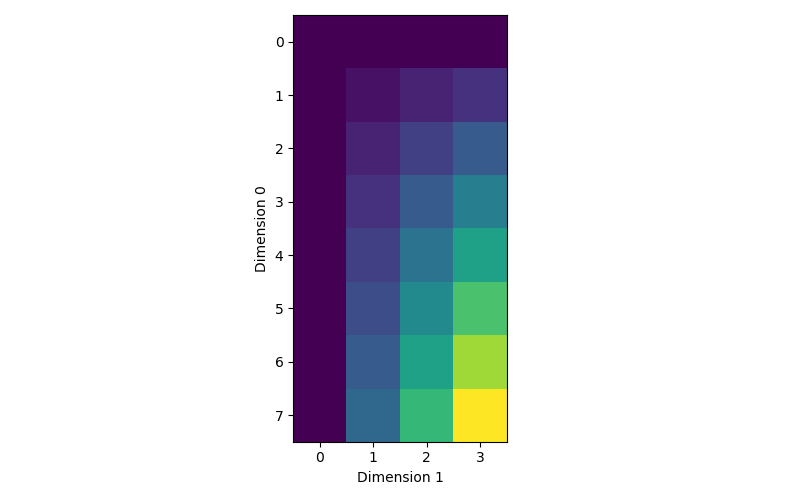

In [3]:
from matplotlib import pyplot as plt
import os
import numpy as np

%matplotlib widget

# Directory where the information is located
filename=os.path.join("image.dat")

# Size of the array
N0=8
N1=4

# Read the binary image from file
image=np.fromfile(filename, dtype=np.float32).reshape((N0,N1))

# Plot the image
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.imshow(image)
ax.set_ylabel("Dimension 0")
ax.set_xlabel("Dimension 1")
plt.tight_layout()
plt.show()

<address>
Written by Dr. Toby Potter of <a href="https://www.pelagos-consulting.com">Pelagos Consulting and Education</a> for the Pawsey Supercomputing Centre
</address>